In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Import DataSet

In [2]:
from keras.datasets import cifar10

In [3]:
(x_train, y_train) , (x_test, y_test) = cifar10.load_data()

In [4]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# x_train has 50000 rows with image size 32x32 and depth 3 i.e. RGB
# y_train has 50000 rows with 1 classifier
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [6]:
# Take a look at First Image as an Array
index = 0
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

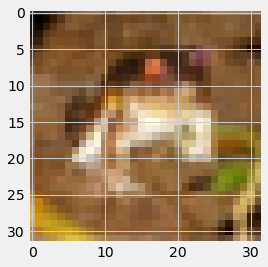

In [7]:
# Show image as a Picture
img = plt.imshow(x_train[index])

In [9]:
# Get the Image Label
# Every number corresponsds to a name, i.e. number 6 is a Frog
print(y_train[index])

[6]


In [14]:
classification = ['airplane','automobile','bird','cat','dear',
                  'dog','frog','horse','ship','truck']
print(classification[y_train[index][0]])

frog


# One Hot encoding of Labels

In [17]:
# Convert the labels into a set of 10 numbers to input into NN
# Every set of rows will have 10 values, all 0 except the one with actual label index
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [22]:
y_train_one_hot[index]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [20]:
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

(50000, 10)
(10000, 10)


# Normalize pixel values between 0 and 1

In [23]:
x_train = x_train /255
x_test = x_test /255

In [24]:
x_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

# Create Model

In [31]:
model = Sequential()

# First Layer (32 5x5 relu convoluted feature maps)
model.add(Conv2D(32, (5,5) , activation = 'relu', input_shape=(32,32,3)))

# 2nd Layer as pooling Layer (creating a pooling layer with 2x2 pixel filter)
model.add(MaxPooling2D(pool_size = (2,2)))

# 3rd Layer (2nd Colvolution Layer)
model.add(Conv2D(32, (5,5) , activation = 'relu'))

# 4th Layer (2nd Pooling Layer)
model.add(MaxPooling2D(pool_size = (2,2)))

# 5th Layer (Flattening Layer)
model.add(Flatten())

# 6th Layer with 1000 neurons to feed from previous layers
model.add(Dense(1000, activation = 'relu'))

# 7th Layer (Dropout layer with 50%)
model.add(Dropout(0.5))

# 8th Layer with 500 neurons to feed from previous layers
model.add(Dense(500, activation = 'relu'))

# 9th Layer (Dropout layer with 50%)
model.add(Dropout(0.5))

# 10th Layer with 250 neurons to feed from previous layers
model.add(Dense(250, activation = 'relu'))

# 11th Layer with 10 neurons (as there are 10 different Classifications)
model.add(Dense(10, activation = 'softmax'))

In [32]:
# Compile the Model

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy']
             )

In [33]:
# Train the Model

hist = model.fit(x_train, y_train_one_hot,
                batch_size = 256, epochs = 10,
                validation_split = 0.2)  # Validation split is 20%

Epoch 1/10
157/157 [==============================] - 31s 197ms/step - loss: 2.0242 - accuracy: 0.2357 - val_loss: 1.5312 - val_accuracy: 0.4364
Epoch 2/10
157/157 [==============================] - 28s 180ms/step - loss: 1.4725 - accuracy: 0.4569 - val_loss: 1.3460 - val_accuracy: 0.5060
Epoch 3/10
157/157 [==============================] - 32s 205ms/step - loss: 1.2878 - accuracy: 0.5336 - val_loss: 1.1856 - val_accuracy: 0.5800
Epoch 4/10
157/157 [==============================] - 29s 182ms/step - loss: 1.1765 - accuracy: 0.5763 - val_loss: 1.1332 - val_accuracy: 0.6010
Epoch 5/10
157/157 [==============================] - 32s 201ms/step - loss: 1.0642 - accuracy: 0.6210 - val_loss: 1.0453 - val_accuracy: 0.6345
Epoch 6/10
157/157 [==============================] - 30s 191ms/step - loss: 1.0149 - accuracy: 0.6451 - val_loss: 1.0241 - val_accuracy: 0.6472
Epoch 7/10
157/157 [==============================] - 32s 206ms/step - loss: 0.9485 - accuracy: 0.6610 - val_loss: 0.9633 - val_ac

# Evaluate the Model using Test Data

### Model is 67% Accurate

In [94]:
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 4s 13ms/step - loss: 0.9467 - accuracy: 0.6701


0.6700999736785889

# Visualize Model's Accuracy and Loss based on validation data

In [35]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

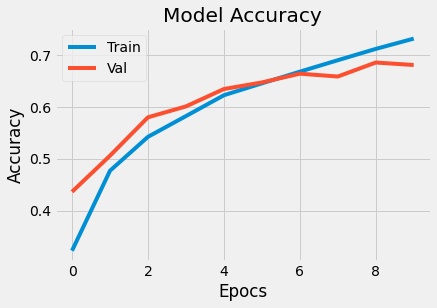

In [41]:
plt.plot(hist.history['accuracy'], label = 'Train')
plt.plot(hist.history['val_accuracy'], label = 'Val')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epocs')
plt.legend()
plt.show()

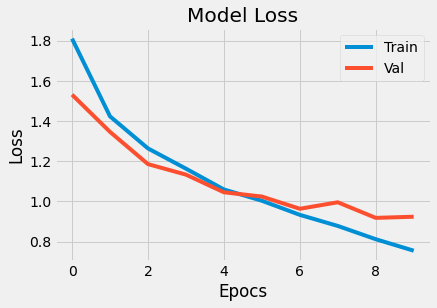

In [44]:
plt.plot(hist.history['loss'], label = 'Train')
plt.plot(hist.history['val_loss'], label = 'Val')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epocs')
plt.legend()
plt.show()

# Test the Model with random images online

# Resize image to 32x32

In [60]:
from PIL import Image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [83]:
img = load_img('airplane1.jpg')
new_width  = 32
new_height = 32
img = img.resize((new_width, new_height), Image.ANTIALIAS)

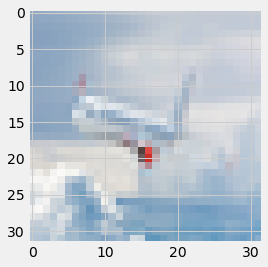

In [84]:
plt.imshow(img)

In [85]:
img_array = img_to_array(img)

In [86]:
img_array.shape

(32, 32, 3)

In [87]:
img_array = np.expand_dims(img_array, axis=0)

In [88]:
img_array.shape

(1, 32, 32, 3)

In [89]:
predictions = model.predict(img_array)
predictions

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.22584555e-33, 0.00000000e+00]], dtype=float32)

In [90]:
# Sort predictions from least to Greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
            
# Show the sorted labels in order
print(list_index)

[0, 8, 2, 3, 4, 5, 6, 7, 1, 9]


In [93]:
# Print first 5 predictions

for i in range(5):
    print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100,2), '%' )

airplane : 100.0 %
ship : 0.0 %
bird : 0.0 %
cat : 0.0 %
dear : 0.0 %
